ATIVIDADE ATIVA - PROBABILIDADE E ESTATÍSTICA - ANÁISE E DESENVOLVIMENTO DE SISTEMAS
-LUCAS MELO PONTE RODRIGUES
-MATRÍCULA: 2186101169

In [ ]:
#Importando a biblioteca pandas
import pandas as pd

In [ ]:
#Importando banco de dados do Drive para o Google Colab
import pandas as pd
import requests
from io import StringIO

orig_url='https://drive.google.com/file/d/1_xtMC5q_7aK0ZhWa2W4Qv-kGXX0bYjgX/view?usp=sharing'


file_id = orig_url.split('/')[-2]
dwn_url='https://drive.google.com/uc?export=download&id=' + file_id
url = requests.get(dwn_url).text
csv_raw = StringIO(url)
dfs = pd.read_csv(csv_raw)
print(dfs.head())

    Invoice ID Branch       City  ... gross margin percentage gross income Rating
0  750-67-8428      A     Yangon  ...                4.761905      26.1415    9.1
1  226-31-3081      C  Naypyitaw  ...                4.761905       3.8200    9.6
2  631-41-3108      A     Yangon  ...                4.761905      16.2155    7.4
3  123-19-1176      A     Yangon  ...                4.761905      23.2880    8.4
4  373-73-7910      A     Yangon  ...                4.761905      30.2085    5.3

[5 rows x 17 columns]


In [ ]:
#Criando DataSet para simplificar "df_shop" em apenas "dfs"
df_shop = dfs

In [ ]:
#Aplicando o recurso (describe) que me da algumas informações importantes
dfs.describe()
#Com essa aplicação ja podemos observar que temos a resposta para a primeira pergunta, quando ele soma o numero total de linhas em "count".
#Visto que cada linha representa uma venda temos o total de 1000 compras registradas nessa base de dados. 
#A problemática é que desta maneira, não é mostrado se tem algum ID de compra repetido.

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.220360e-14,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000


In [ ]:
#Mostrando numero de linhas e colunas da base para analizar os dados separadamente.
dfs.shape

(1000, 17)

In [ ]:
#Especificando o nome de cada coluna para analizar os dados separadamente.
dfs.keys()

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

In [ ]:
#Outra forma de verificar quantas compras foram registradas na base de forma mais acertiva é utilisando o recurso "nunique" especificando qual dado quer saber a quantidade.
#Desta forma o recurso "nunique" soma cada numero de forma única.
#Assim sendo: Quantas compras foram registradas nesta base?
df_shop['Invoice ID'].nunique()

1000

In [ ]:
#Para filtrar as compras realizadas apenas por pessoas do sexo feminino usamos o seguinte comando:
dfs[(df_shop['Gender'] == 'Female')]

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
6,355-53-5943,A,Yangon,Member,Female,Electronic accessories,68.84,6,20.6520,433.6920,2/25/2019,14:36,Ewallet,413.04,4.761905,20.6520,5.8
7,315-22-5665,C,Naypyitaw,Normal,Female,Home and lifestyle,73.56,10,36.7800,772.3800,2/24/2019,11:38,Ewallet,735.60,4.761905,36.7800,8.0
8,665-32-9167,A,Yangon,Member,Female,Health and beauty,36.26,2,3.6260,76.1460,1/10/2019,17:15,Credit card,72.52,4.761905,3.6260,7.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
990,886-18-2897,A,Yangon,Normal,Female,Food and beverages,56.56,5,14.1400,296.9400,3/22/2019,19:06,Credit card,282.80,4.761905,14.1400,4.5
991,602-16-6955,B,Mandalay,Normal,Female,Sports and travel,76.60,10,38.3000,804.3000,1/24/2019,18:10,Ewallet,766.00,4.761905,38.3000,6.0
994,652-49-6720,C,Naypyitaw,Member,Female,Electronic accessories,60.95,1,3.0475,63.9975,2/18/2019,11:40,Ewallet,60.95,4.761905,3.0475,5.9
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4


In [ ]:
#Para contar as linhas das compras acima:
dfs[(df_shop['Gender'] == 'Female')]['Invoice ID'].count()

501

In [ ]:
#outra maneira de separar os dados é utilizando o recurso "value_count", especificando qual dado quer separar as quantidades:
#Neste caso queremos separar as quantidades de compras feitas por pessoas com diferentes gêneros (coluna "Gender"):
dfs['Gender'].value_counts()
#Temos 501 compras registradas com clientes do sexo feminino


Female    501
Male      499
Name: Gender, dtype: int64

In [ ]:
#Da mesma maneira da célula acima podemos separar as quantidades de cada filial (coluna "Branch")
dfs['Branch'].value_counts()
#Podemos ver que a filial A possui maior quantidade de vendas efetuadas.

A    340
B    332
C    328
Name: Branch, dtype: int64

In [ ]:
#Podemos separar também dois tipos de dados, agrupando as informações, como por exemplo o numero de vendas registradas por pessoas de gênero diferente por cada filial.
#Para isso usamos o comando "groupby", especificando cada dado:
dfs.groupby(['Branch','Gender'])['Invoice ID'].count()
#Desta maneira vemos que a filial com maior numero de vendas para o sexo feminino é a filial C.


Branch  Gender
A       Female    161
        Male      179
B       Female    162
        Male      170
C       Female    178
        Male      150
Name: Invoice ID, dtype: int64

In [ ]:
#Recuperamos o Data Frame original para responder as próximas perguntas:
df_shop = dfs

In [ ]:
#Para sabermos a média dos valores das compras ja vimos que o recurso "describe" nos fornece essa informação. Caso queiramos essa informação de um grupo específico, em uma cidade específica, devemos especificar no código o que queremos:
dfs[(dfs['City'] == 'Mandalay')]
#Aqui temos todas as compras da cidade de Mandalay

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
9,692-92-5582,B,Mandalay,Member,Female,Food and beverages,54.84,3,8.226,172.746,2/20/2019,13:27,Credit card,164.52,4.761905,8.226,5.9
10,351-62-0822,B,Mandalay,Member,Female,Fashion accessories,14.48,4,2.896,60.816,2/6/2019,18:07,Ewallet,57.92,4.761905,2.896,4.5
11,529-56-3974,B,Mandalay,Member,Male,Electronic accessories,25.51,4,5.102,107.142,3/9/2019,17:03,Cash,102.04,4.761905,5.102,6.8
15,299-46-1805,B,Mandalay,Member,Female,Sports and travel,93.72,6,28.116,590.436,1/15/2019,16:19,Cash,562.32,4.761905,28.116,4.5
19,319-50-3348,B,Mandalay,Normal,Female,Home and lifestyle,40.30,2,4.030,84.630,3/11/2019,15:30,Ewallet,80.60,4.761905,4.030,4.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
987,552-44-5977,B,Mandalay,Member,Male,Health and beauty,62.00,8,24.800,520.800,1/3/2019,19:08,Credit card,496.00,4.761905,24.800,6.2
989,430-53-4718,B,Mandalay,Member,Male,Health and beauty,75.37,8,30.148,633.108,1/28/2019,15:46,Credit card,602.96,4.761905,30.148,8.4
991,602-16-6955,B,Mandalay,Normal,Female,Sports and travel,76.60,10,38.300,804.300,1/24/2019,18:10,Ewallet,766.00,4.761905,38.300,6.0
993,690-01-6631,B,Mandalay,Normal,Male,Fashion accessories,17.49,10,8.745,183.645,2/22/2019,18:35,Ewallet,174.90,4.761905,8.745,6.6


In [ ]:
#Queremos saber a média dos valores das compras feitas por Membros (de um tipo de clube do mercado). A coluna "Customer Type" que diferencia se é membro ou não.
#O dado que queremos obter a média é dado na coluna "Total", assim especificamos cada dado e aplicamos o "describe":
dfs[(dfs['City'] == 'Mandalay')]['Total'].describe()



count     332.000000
mean      319.872506
std       242.447565
min        18.637500
25%       119.936250
50%       252.882000
75%       465.585750
max      1022.490000
Name: Total, dtype: float64

In [ ]:
#Porém ainda não separei por "membro" e "normal". Vamos especificar também essa informação.
#Primeiro criamos um DataSet paralelo com a separação da cidade de Mandalay:
df_temp = dfs[(dfs['City'] == 'Mandalay')]
#Depois aplicamos a esse DataSet o filtro de "Member" da coluna "Customer type".
df_temp[(df_temp ['Customer type'] == 'Member')]['Total'].describe()
#Temos a média dos valores das compras feitas por membros na cidade de Mandalay = 325.482.



count    165.000000
mean     325.482945
std      242.734212
min       20.107500
25%      116.140500
50%      258.678000
75%      470.988000
max      944.622000
Name: Total, dtype: float64

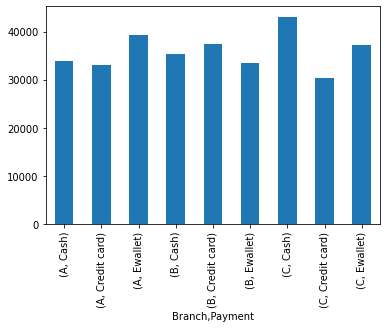

In [ ]:
#Elabore um gráfico de barras mostrando o total valor total de pagamentos realizados em cada filial, diferenciando o tipo de pagamento.
#Podemos afirmar que há um meio de pagamento preferido pelos clientes da rede de supermercados?
#Primeiro criamos um DataSet paralelo só com essas informações:
df_temp = dfs.groupby(['Branch','Payment'])['Total'].sum()
#Para gerar o gráfico usaremos o comando "plot.bar" do pandas:
df_temp.plot.bar()


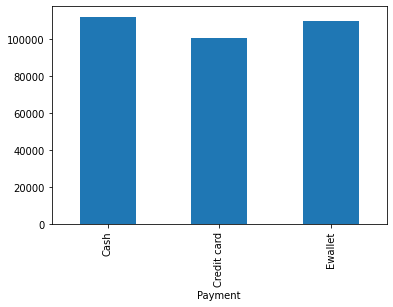

In [76]:
#Para responder a pergunta iremos retirar a informação "Branch" do código para unificarmos todas as filias e analisar se há uma forma de pagamento mais utilizada.
df_temp = dfs.groupby(['Payment'])['Total'].sum()
#Agora, geramos o gráfico:
df_temp.plot.bar()
#Nesse gráfico podemos ver que há uma disputa acirrada entre as formas de pagamento "Cash" e "Ewallet". Para sanarmos a Dúvida, vamos tirar essa informação do numero de vendas registradas com cada forma de pagamento.

In [90]:
#Vamos tirar essa informação do numero de vendas registradas com cada forma de pagamento:
dfs.groupby(['Payment'])['Invoice ID'].count()
#Assim então, podemos ver que a forma de pagamento "Ewallet" é a mais utilizada pelos clientes.

Payment
Cash           344
Credit card    311
Ewallet        345
Name: Invoice ID, dtype: int64

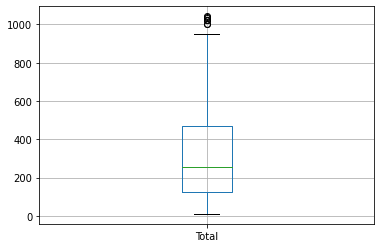

In [78]:
#Há outliers no valor total de compras realizadas?
#Uma ferramenta ótima para verificar se há outliers é o gráfico boxplot. Vamos então gerar um gráfico boxplot com o valor total de compras.
dfs.boxplot('Total')
#Com o gráfico conseguimos observar que há outliers no valor total de compras realizadas.

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


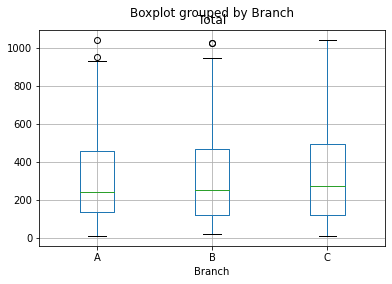

In [80]:
#Vamos separar o gráfico acima por filial (Branch).
dfs.boxplot(by='Branch', column='Total')

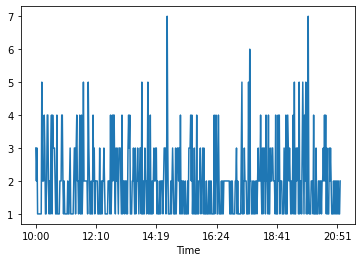

In [92]:
#Elabore um gráfico de linha que ilustra o valor total de vendas de acordo com a hora do dia. Há um horário que os clientes costumam gastar mais?
#Primeiro criamos um DataSet paralelo com essas informações.
df_temp = df_shop.groupby(['Time'])['Total'].count()
#Para gerar o gráfico usaremos o comando "plot.bar" do pandas:
df_shop.groupby(['Time'])['Total'].count().plot()
#Analisando o gráfico podemos ver e afirmar que existem alguns horários em que os clientes costumam gastar mais.
